# Spotify-Track Exploratory Data Analysis:

This notebook provides an in-depth analysis of a Spotify dataset. It covers the data cleaning and exploratory data analysis (EDA) processes, revealing key insights into music popularity, artist trends, and song characteristics.

In [24]:
#Importing useful libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [25]:
#importing the required datasets
info = pd.read_csv('spotify_data_description.csv')
df = pd.read_csv('spotify_tracks.csv')

In [26]:
df.head() #gives an idea about the main datset

,track_id,track_name,artist_name,year,popularity,artwork_url,album_name,acousticness,danceability,duration_ms,...,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_url,language
0,2r0ROhr7pRN4MXDMT1fEmd,"Leo Das Entry (From ""Leo"")",Anirudh Ravichander,2024,59,https://i.scdn.co/image/ab67616d0000b273ce9c65...,"Leo Das Entry (From ""Leo"")",0.0241,0.753,97297.0,...,8.0,0.1000,-5.994,0.0,0.1030,110.997,4.0,0.459,https://open.spotify.com/track/2r0ROhr7pRN4MXD...,Tamil
1,4I38e6Dg52a2o2a8i5Q5PW,AAO KILLELLE,"Anirudh Ravichander, Pravin Mani, Vaishali Sri...",2024,47,https://i.scdn.co/image/ab67616d0000b273be1b03...,AAO KILLELLE,0.0851,0.780,207369.0,...,10.0,0.0951,-5.674,0.0,0.0952,164.995,3.0,0.821,https://open.spotify.com/track/4I38e6Dg52a2o2a...,Tamil
2,59NoiRhnom3lTeRFaBzOev,Mayakiriye Sirikiriye - Orchestral EDM,"Anirudh Ravichander, Anivee, Alvin Bruno",2024,35,https://i.scdn.co/image/ab67616d0000b27334a1dd...,Mayakiriye Sirikiriye (Orchestral EDM),0.0311,0.457,82551.0,...,2.0,0.0831,-8.937,0.0,0.1530,169.996,4.0,0.598,https://open.spotify.com/track/59NoiRhnom3lTeR...,Tamil
3,5uUqRQd385pvLxC8JX3tXn,Scene Ah Scene Ah - Experimental EDM Mix,"Anirudh Ravichander, Bharath Sankar, Kabilan, ...",2024,24,https://i.scdn.co/image/ab67616d0000b27332e623...,Scene Ah Scene Ah (Experimental EDM Mix),0.2270,0.718,115831.0,...,7.0,0.1240,-11.104,1.0,0.4450,169.996,4.0,0.362,https://open.spotify.com/track/5uUqRQd385pvLxC...,Tamil
4,1KaBRg2xgNeCljmyxBH1mo,Gundellonaa X I Am A Disco Dancer - Mashup,"Anirudh Ravichander, Benny Dayal, Leon James, ...",2024,22,https://i.scdn.co/image/ab67616d0000b2735a59b6...,Gundellonaa X I Am a Disco Dancer (Mashup),0.0153,0.689,129621.0,...,7.0,0.3450,-9.637,1.0,0.1580,128.961,4.0,0.593,https://open.spotify.com/track/1KaBRg2xgNeCljm...,Tamil


In [27]:
df.shape

(62317, 22)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62317 entries, 0 to 62316
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          62317 non-null  object 
 1   track_name        62317 non-null  object 
 2   artist_name       62317 non-null  object 
 3   year              62317 non-null  int64  
 4   popularity        62317 non-null  int64  
 5   artwork_url       62317 non-null  object 
 6   album_name        62317 non-null  object 
 7   acousticness      62317 non-null  float64
 8   danceability      62317 non-null  float64
 9   duration_ms       62317 non-null  float64
 10  energy            62317 non-null  float64
 11  instrumentalness  62317 non-null  float64
 12  key               62317 non-null  float64
 13  liveness          62317 non-null  float64
 14  loudness          62317 non-null  float64
 15  mode              62317 non-null  float64
 16  speechiness       62317 non-null  float6

#### Insight:
These tell us the number rows and columns, data types of the columns, memory usage and no. of null values in the dataset.

In [29]:
info
#this dataset describes the columns of the main track data set

,Column Name,Description
0,track_id,A unique identifier for the track on Spotify.
1,track_name,The title of the song.
2,artist_name,The name of the artist(s) who performed the song.
3,year,The release year of the song.
4,popularity,"A measure of how popular a track is, ranging f..."
5,artwork_url,A URL pointing to the album artwork for the tr...
6,album_name,The name of the album the track belongs to.
7,acousticness,A confidence measure indicating whether the tr...
8,danceability,A measure of how suitable a track is for danci...
9,duration_ms,The duration of the track in milliseconds.


In [30]:
df.columns 

Index(['track_id', 'track_name', 'artist_name', 'year', 'popularity',
       'artwork_url', 'album_name', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'track_url', 'language'],
      dtype='object')

In [31]:
df.nunique()

track_id            62239
track_name          41521
artist_name         12513
year                   54
popularity             93
artwork_url         21110
album_name          19898
acousticness         3484
danceability         1157
duration_ms         32109
energy               1878
instrumentalness     5065
key                    13
liveness             1690
loudness            17054
mode                    3
speechiness          1484
tempo               27749
time_signature          6
valence              1642
track_url           62239
language                7
dtype: int64

## Data cleaning:

We can see there's no null values present. We can look for the duplicate rows and remove them.

In [32]:
df.duplicated().sum()

78

In [33]:
#dropping the duplicate columns
df = df.drop_duplicates()

In [34]:
df.shape

(62239, 22)

We can drop the track_id, artwork_url and track_url columns as they won't be much use for the analysis

In [35]:
df = df.drop(['track_id', 'artwork_url','track_url'], axis=1)

In [36]:
# we can make a new column which categorises the popularity column by creating bins in between and thus would be easier to draw an analysis
# we can also change the unit of duration from ms to min and then drop the duration_ms column
df['popularity_level'] = pd.cut(df['popularity'],
                                bins=[0,25,50,75,100],
                                labels=['Low','Moderate','Average','Massive'])
df['duration_min'] = df['duration_ms']/60000
df.drop('duration_ms', axis = 1, inplace = True)

In [37]:
df.shape

(62239, 20)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62239 entries, 0 to 62316
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   track_name        62239 non-null  object  
 1   artist_name       62239 non-null  object  
 2   year              62239 non-null  int64   
 3   popularity        62239 non-null  int64   
 4   album_name        62239 non-null  object  
 5   acousticness      62239 non-null  float64 
 6   danceability      62239 non-null  float64 
 7   energy            62239 non-null  float64 
 8   instrumentalness  62239 non-null  float64 
 9   key               62239 non-null  float64 
 10  liveness          62239 non-null  float64 
 11  loudness          62239 non-null  float64 
 12  mode              62239 non-null  float64 
 13  speechiness       62239 non-null  float64 
 14  tempo             62239 non-null  float64 
 15  time_signature    62239 non-null  float64 
 16  valence           62239 non

## Quantitative Analysis:

In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,62239.0,2014.417969,9.648517,1971.000000,2011.0000,2017.000000,2022.000000,2024.00000
popularity,62239.0,15.357589,18.630494,0.000000,0.0000,7.000000,26.000000,93.00000
acousticness,62239.0,0.362342,0.314674,-1.000000,0.0671,0.286000,0.633000,0.99600
danceability,62239.0,0.596768,0.186262,-1.000000,0.4970,0.631000,0.730000,0.98600
energy,62239.0,0.602416,0.246207,-1.000000,0.4400,0.639000,0.803000,1.00000
instrumentalness,62239.0,0.146054,0.307637,-1.000000,0.0000,0.000025,0.015100,0.99900
key,62239.0,5.101544,3.553433,-1.000000,2.0000,5.000000,8.000000,11.00000
liveness,62239.0,0.194172,0.172075,-1.000000,0.0932,0.125000,0.243000,0.99800
loudness,62239.0,-65.174856,2370.534662,-100000.000000,-10.7290,-7.506000,-5.455000,1.23300
mode,62239.0,0.586063,0.493682,-1.000000,0.0000,1.000000,1.000000,1.00000


Year :- Mean = 2014, min = 1971, max = 2024, the quartiles show that more songs were published in the recent years and there fewer values before 2000

Popularity :- Mean = 15.3, min = 0, max = 93, the quartiles show that the distribution is more towards the lower values, however there are few outliers towards the higher values

Acousticness, Danceability, Energy, Tempo all seem to have a uniform spread or a normal distribution throughout the data range.

Duration_min seems to have many outliers, the data is mostly spread within the fewer values. (mostly because of the presence of long podcasts)

Speechiness, liveness, instrumentalness also have outliers towards the higher side of values.

However Loudness seems to be the most disturbed column because of weird values such as -1000000. We can filter out such values and only keep data between -60dB to 0dB

In [40]:
df = df[(df['loudness'] > -60) & (df['loudness'] < 0)]

In [41]:
df.shape

(62191, 20)

In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,62191.0,2014.415221,9.648624,1971.000000,2011.0000,2017.000000,2022.00000,2024.00000
popularity,62191.0,15.364538,18.632701,0.000000,0.0000,7.000000,26.00000,93.00000
acousticness,62191.0,0.363120,0.313107,0.000002,0.0673,0.286000,0.63300,0.99600
danceability,62191.0,0.597654,0.182408,0.000000,0.4980,0.631000,0.73000,0.98600
energy,62191.0,0.603274,0.243300,0.000020,0.4400,0.639000,0.80300,0.99900
instrumentalness,62191.0,0.146700,0.306530,0.000000,0.0000,0.000025,0.01515,0.99900
key,62191.0,5.105385,3.551422,0.000000,2.0000,5.000000,8.00000,11.00000
liveness,62191.0,0.194836,0.169783,0.011900,0.0932,0.125000,0.24300,0.99800
loudness,62191.0,-8.946058,5.327861,-45.920000,-10.7215,-7.505000,-5.45500,-0.00500
mode,62191.0,0.586934,0.492388,0.000000,0.0000,1.000000,1.00000,1.00000


In [43]:
# We can add a range column and a coefficient of variation column to this dataframe.
summary = df.describe().T
summary['range'] = summary['max'] - summary['min']
summary['cv'] = (summary['std'] / summary['mean']).round(2)
summary

,count,mean,std,min,25%,50%,75%,max,range,cv
year,62191.0,2014.415221,9.648624,1971.000000,2011.0000,2017.000000,2022.00000,2024.00000,53.000000,0.00
popularity,62191.0,15.364538,18.632701,0.000000,0.0000,7.000000,26.00000,93.00000,93.000000,1.21
acousticness,62191.0,0.363120,0.313107,0.000002,0.0673,0.286000,0.63300,0.99600,0.995998,0.86
danceability,62191.0,0.597654,0.182408,0.000000,0.4980,0.631000,0.73000,0.98600,0.986000,0.31
energy,62191.0,0.603274,0.243300,0.000020,0.4400,0.639000,0.80300,0.99900,0.998980,0.40
instrumentalness,62191.0,0.146700,0.306530,0.000000,0.0000,0.000025,0.01515,0.99900,0.999000,2.09
key,62191.0,5.105385,3.551422,0.000000,2.0000,5.000000,8.00000,11.00000,11.000000,0.70
liveness,62191.0,0.194836,0.169783,0.011900,0.0932,0.125000,0.24300,0.99800,0.986100,0.87
loudness,62191.0,-8.946058,5.327861,-45.920000,-10.7215,-7.505000,-5.45500,-0.00500,45.915000,-0.60
mode,62191.0,0.586934,0.492388,0.000000,0.0000,1.000000,1.00000,1.00000,1.000000,0.84


In [44]:
print(df.skew(numeric_only=True))
print(df.kurtosis(numeric_only=True))

year               -1.519647
popularity          1.230852
acousticness        0.486151
danceability       -0.763755
energy             -0.537597
instrumentalness    1.824831
key                 0.057805
liveness            2.296321
loudness           -1.824510
mode               -0.353122
speechiness         4.488898
tempo               0.366447
time_signature     -3.311762
valence            -0.121822
duration_min        9.381201
dtype: float64
year                  2.090412
popularity            0.660541
acousticness         -1.137858
danceability          0.131169
energy               -0.534778
instrumentalness      1.559414
key                  -1.265500
liveness              5.829478
loudness              4.315808
mode                 -1.875365
speechiness          25.988183
tempo                -0.168984
time_signature       15.975065
valence              -1.023577
duration_min        235.760268
dtype: float64


They show if the data is right skewed or left skewed or normal and the peakness of the data spread. However, the duration_min shows a peculiar spread and highly right skewed- which means that a greater part of the data is towards 0. We might need to log scale the column to manage the outliers or it might cause problems during visualization.

In [53]:
df['duration_log'] = np.log1p(df['duration_min'])  # log1p handles zero safely

In [54]:
df.nunique()

track_name          41485
artist_name         12511
year                   54
popularity             93
album_name          19886
acousticness         3482
danceability         1155
energy               1875
instrumentalness     5064
key                    12
liveness             1688
loudness            17040
mode                    2
speechiness          1483
tempo               27746
time_signature          5
valence              1641
language                7
popularity_level        4
duration_min        32077
duration_log        32077
dtype: int64

In [47]:
df['popularity_level'].value_counts()

popularity_level
Low         28480
Moderate    11836
Average      3953
Massive       257
Name: count, dtype: int64

In [51]:
#top 10 frequent artists
df['artist_name'].value_counts().head(10)

artist_name
Shankar Mahadevan    1391
Alan Silvestri       1178
Daniel Pemberton     1154
Ramin Djawadi        1152
Shreya Ghoshal       1041
Madonna               921
Taylor Swift          903
Justin Bieber         876
Billy Joel            852
Blake Neely           791
Name: count, dtype: int64

In [50]:
#top 10 frequent albums
df['album_name'].value_counts().head(10)

album_name
Nowhere to Hide (Unabridged)                                                                                                                  186
Cottage by the Sea [A BRAND NEW pulse-pounding, gripping psychological thriller from TOP TEN BESTSELLER Keri Beevis for 2024 (Unabridged)]    144
The Summer House [The BRAND NEW addictive psychological thriller from the bestselling author of THE SLEEPOVER (Unabridged)]                   140
The Boat House [The BRAND NEW page-turning psychological thriller from TOP 10 BESTSELLER Keri Beevis for 2023 (Unabridged)]                   115
Dawn FM (Alternate World)                                                                                                                      83
Hybrid Theory (20th Anniversary Edition)                                                                                                       79
After Hours (Deluxe)                                                                                             

In [52]:
#to find out the correlation of different columns with popularity
df.select_dtypes(include=['number']).corr()['popularity'].sort_values(ascending=False)

popularity          1.000000
loudness            0.201477
energy              0.147509
time_signature      0.059604
danceability        0.042036
tempo               0.027901
year                0.015169
valence             0.009190
key                 0.003765
liveness           -0.012352
mode               -0.014393
duration_min       -0.040486
speechiness        -0.053595
instrumentalness   -0.127128
acousticness       -0.138464
Name: popularity, dtype: float64

We can observe that loudness, energy are more correlated, ie, louder and more energetic the song is, its more popular. Similarly instrumentalness and acousticness is negatively correlated which means that less acoustic songs are more popular

## Visual Analysis:

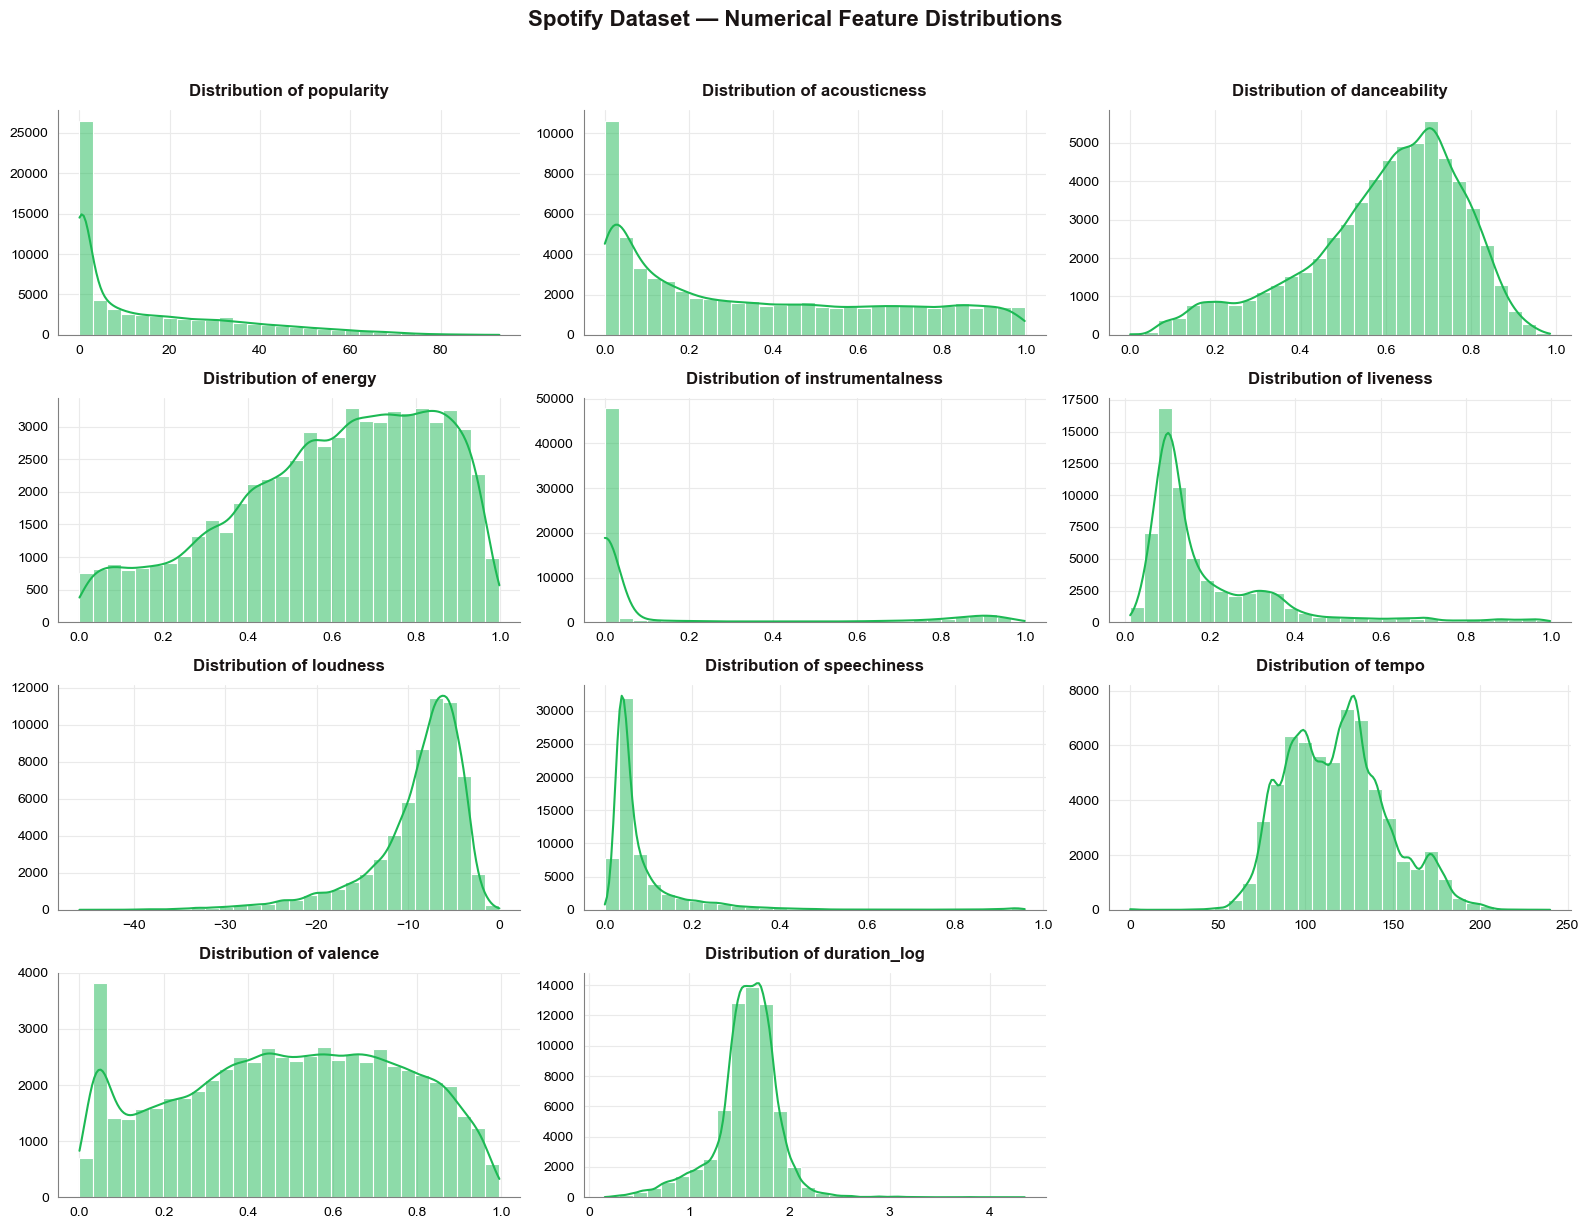

In [58]:
spotify_green = "#1DB954"
spotify_light_green = "#1ED760"
spotify_gray = "#191414"
# Apply a clean Seaborn style
sns.set_style("whitegrid")
plt.rcParams.update({
    "axes.facecolor": "white",
    "figure.facecolor": "white",
    "axes.edgecolor": "gray",
    "grid.color": "#EAEAEA",
    "axes.labelcolor": "black",
    "xtick.color": "black",
    "ytick.color": "black",
    "axes.titleweight": "bold"
})
num_cols = [
    'popularity', 'acousticness', 'danceability', 'energy', 
    'instrumentalness', 'liveness', 'loudness', 'speechiness', 
    'tempo', 'valence', 'duration_log'
]
fig, axes = plt.subplots(4, 3, figsize=(16, 12))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.histplot(
        df[col],
        kde=True,
        bins=30,
        color=spotify_green,
        line_kws={'color': spotify_gray, 'lw': 1.5},
        ax=axes[i]
    )
    axes[i].set_title(f"Distribution of {col}",
                      fontsize=12,
                      color=spotify_gray,
                      pad=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].spines[['top', 'right']].set_visible(False)
# Remove any extra empty subplots
for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Spotify Dataset — Numerical Feature Distributions",
             fontsize=16,
             color=spotify_gray,
             weight='bold',
             y=1.02)
plt.tight_layout()
plt.show()

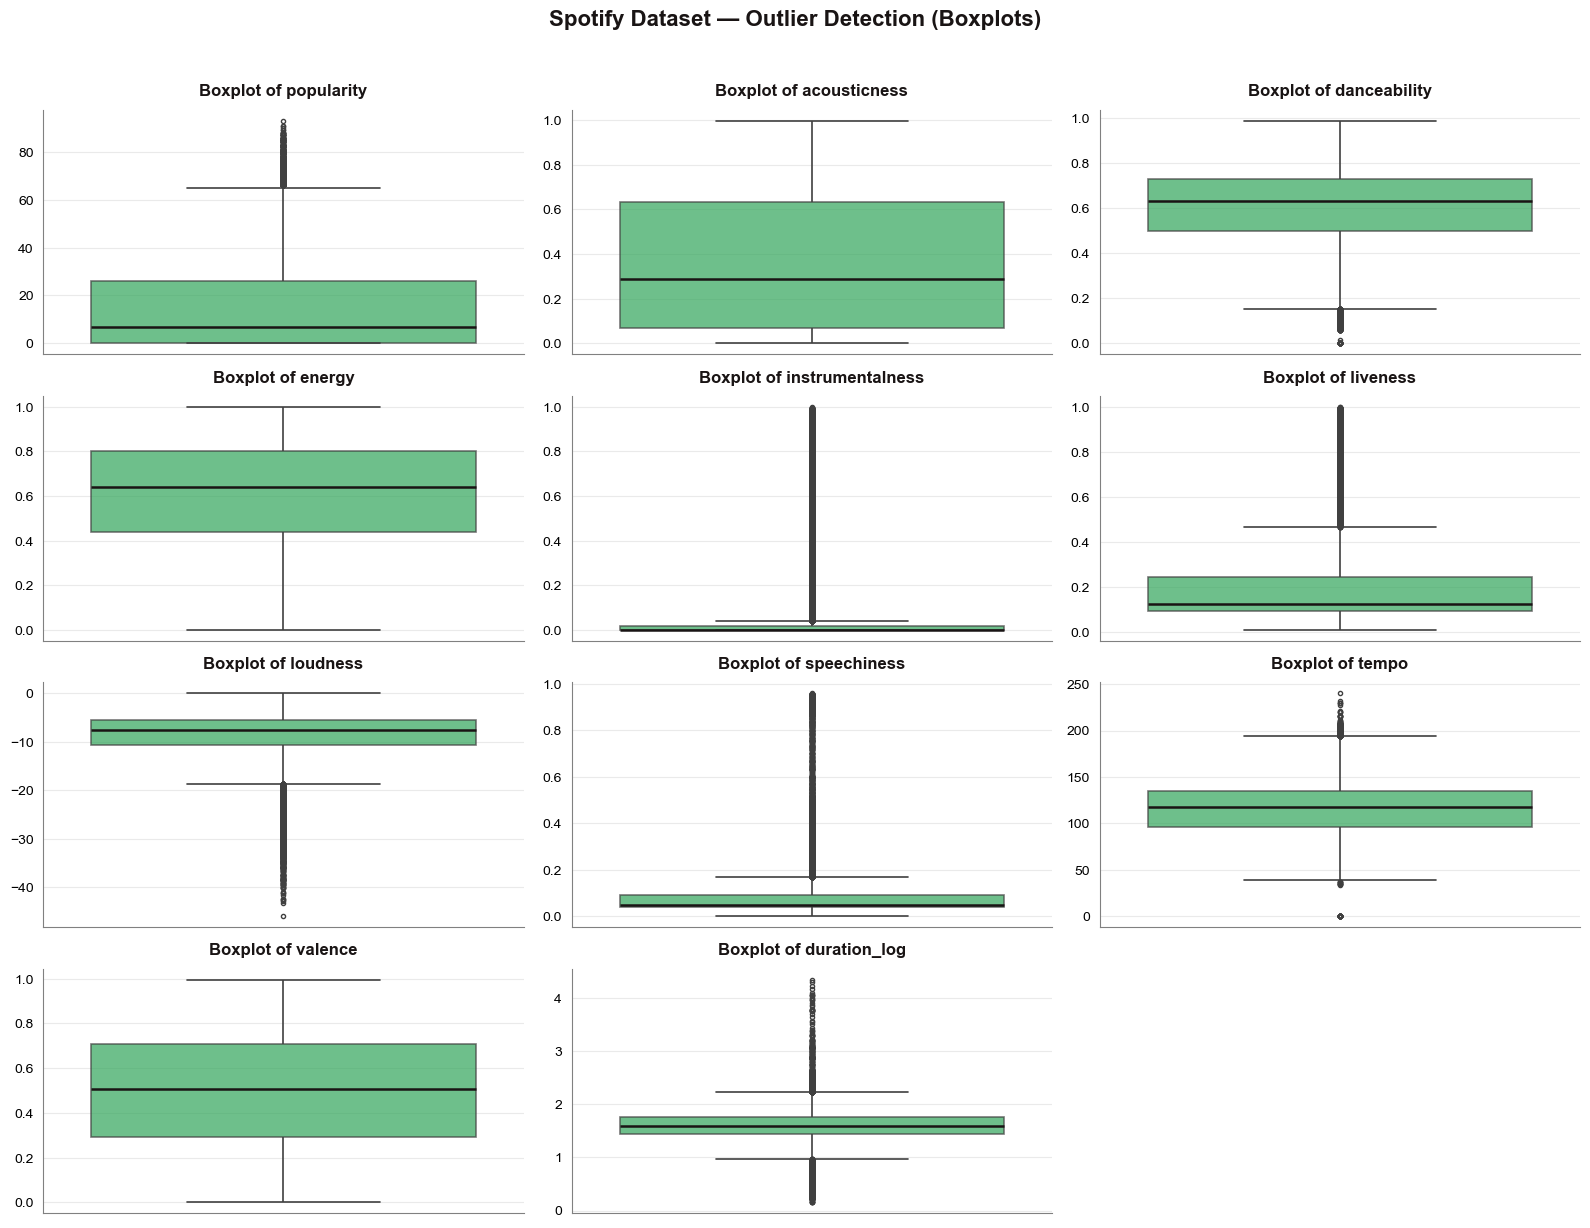

In [60]:
spotify_green = "#1DB954"
spotify_light_green = "#1ED760"
spotify_gray = "#191414"
# Seaborn style for clean visuals
sns.set_style("whitegrid")
plt.rcParams.update({
    "axes.facecolor": "white",
    "figure.facecolor": "white",
    "axes.edgecolor": "gray",
    "grid.color": "#EAEAEA",
    "axes.labelcolor": "black",
    "xtick.color": "black",
    "ytick.color": "black",
    "axes.titleweight": "bold"
})
num_cols = [
    'popularity', 'acousticness', 'danceability', 'energy', 
    'instrumentalness', 'liveness', 'loudness', 'speechiness', 
    'tempo', 'valence', 'duration_log'
]
# Create grid of boxplots
fig, axes = plt.subplots(4, 3, figsize=(16, 12))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.boxplot(
        y=df[col],
        color=spotify_green,
        fliersize=3,             # smaller outlier dots
        linewidth=1.2,
        boxprops=dict(alpha=0.7),
        medianprops=dict(color=spotify_gray, linewidth=1.8),
        ax=axes[i]
    )
    axes[i].set_title(f"Boxplot of {col}",
                      fontsize=12,
                      color=spotify_gray,
                      pad=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].spines[['top', 'right']].set_visible(False)
# Remove extra subplots if fewer than 12
for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])
plt.suptitle("Spotify Dataset — Outlier Detection (Boxplots)",
             fontsize=16,
             color=spotify_gray,
             weight='bold',
             y=1.02)
plt.tight_layout()
plt.show()

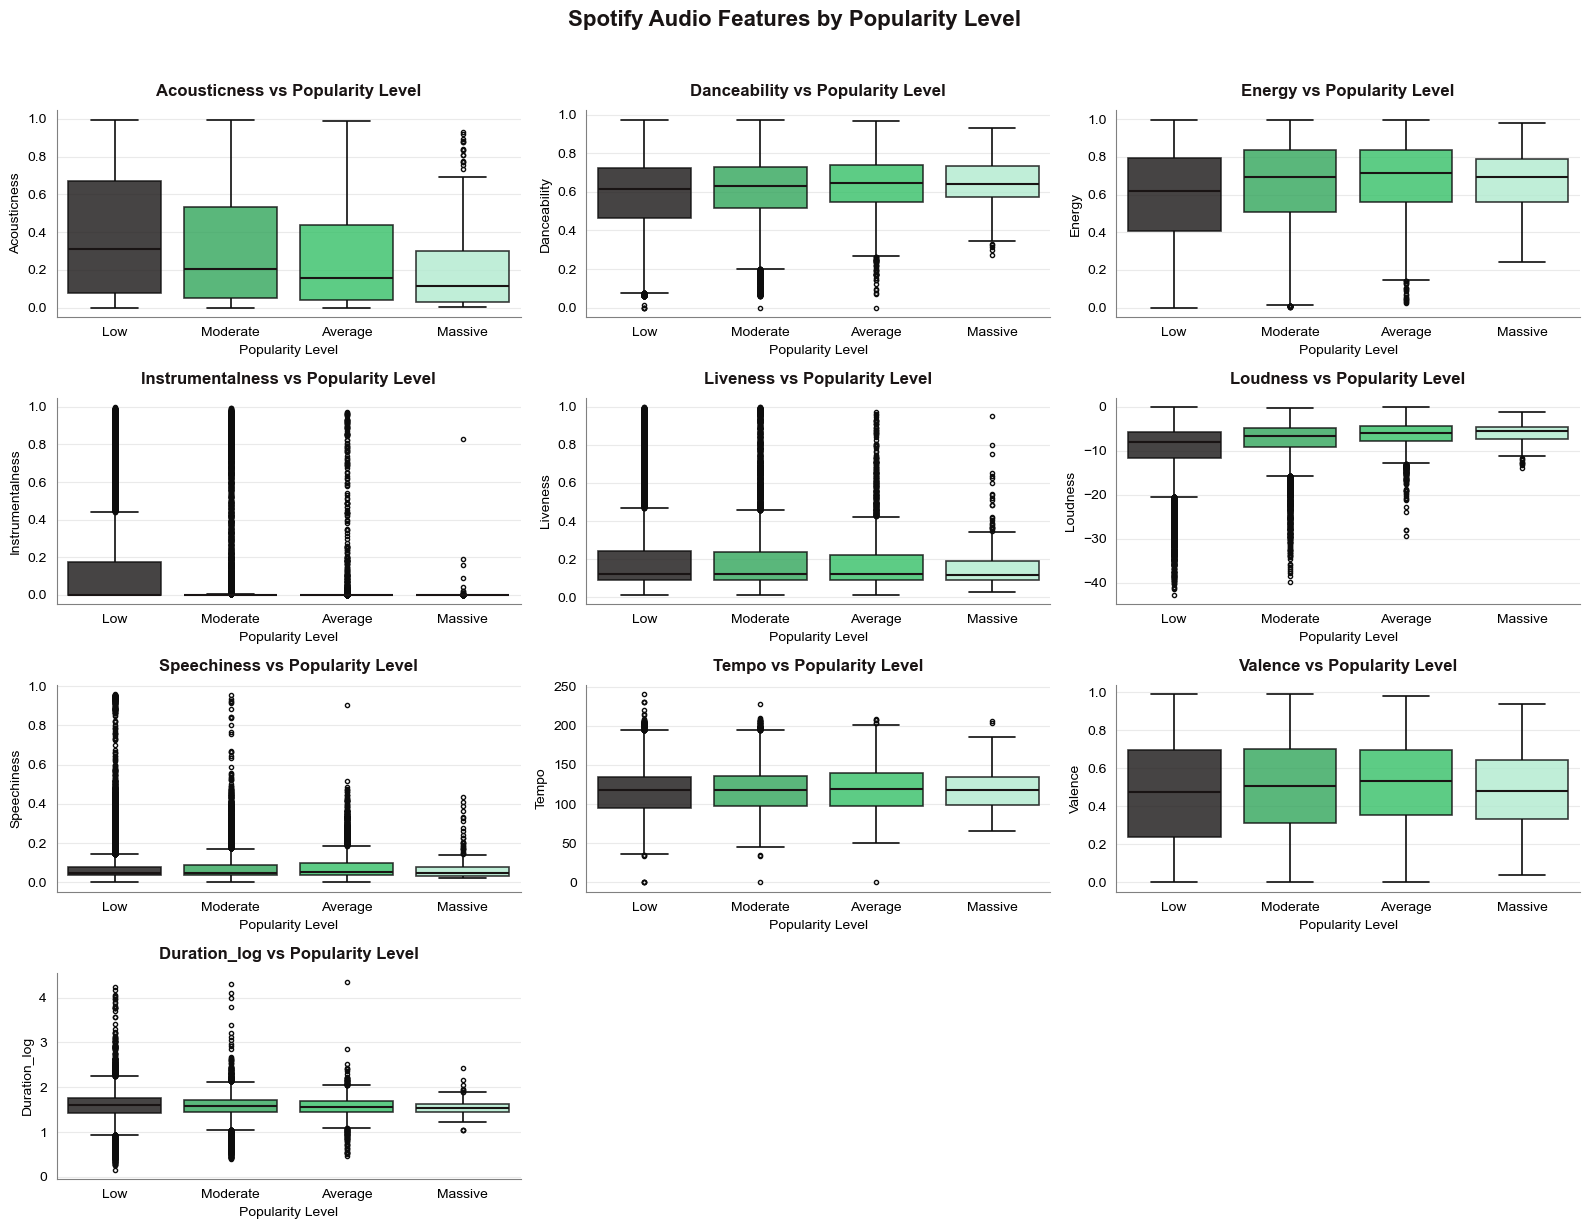

In [61]:
spotify_green = "#1DB954"
spotify_light_green = "#1ED760"
spotify_gray = "#191414"
spotify_palette = [spotify_gray, spotify_green, spotify_light_green, "#A7F3D0"]  # gradient effect
# Apply clean white theme
sns.set_style("whitegrid")
plt.rcParams.update({
    "axes.facecolor": "white",
    "figure.facecolor": "white",
    "axes.edgecolor": "gray",
    "grid.color": "#EAEAEA",
    "axes.labelcolor": "black",
    "xtick.color": "black",
    "ytick.color": "black",
    "axes.titleweight": "bold"
})
# Create plots
plt.figure(figsize=(16, 12))
for i, col in enumerate(num_cols[1:], 1):  # skip 'popularity'
    plt.subplot(4, 3, i)
    sns.boxplot(
        x='popularity_level',
        y=col,
        data=df,
        palette=spotify_palette,
        linewidth=1.2,
        fliersize=3,
        boxprops=dict(alpha=0.8),
        medianprops=dict(color=spotify_gray, linewidth=1.5)
    )
    plt.title(f'{col.capitalize()} vs Popularity Level',
              fontsize=12,
              color=spotify_gray,
              pad=10)
    plt.xlabel("Popularity Level", fontsize=10)
    plt.ylabel(col.capitalize(), fontsize=10)
    plt.xticks(rotation=0)
    sns.despine()
plt.suptitle("Spotify Audio Features by Popularity Level",
             fontsize=16,
             color=spotify_gray,
             weight='bold',
             y=1.02)
plt.tight_layout()
plt.show()

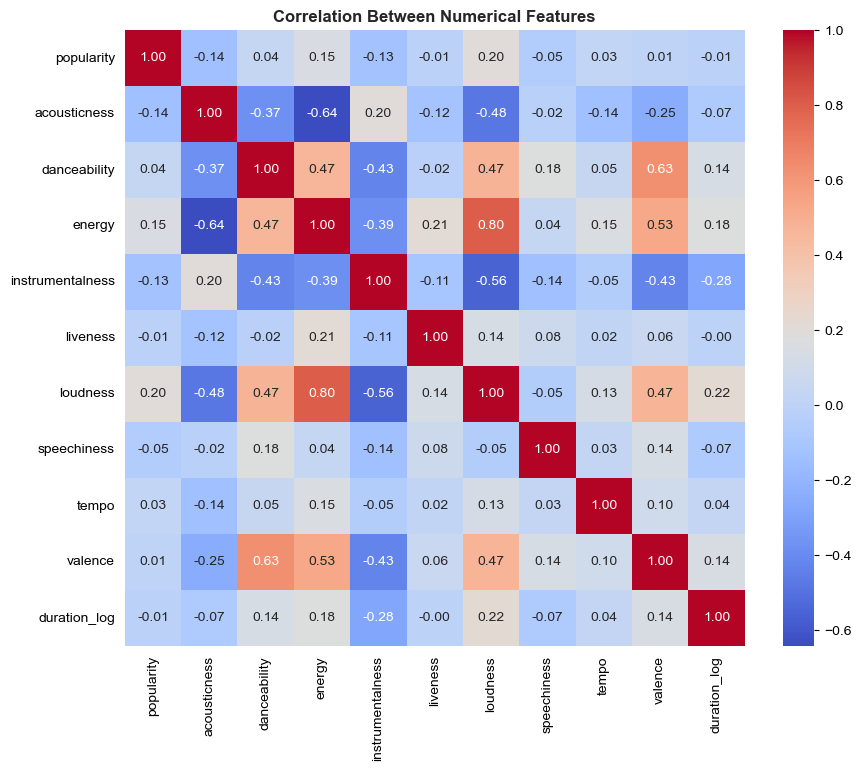

In [62]:
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Numerical Features')
plt.show()

## Categorical Analysis:

In [65]:
# Top and bottom tracks by popularity
top_tracks = df[['track_name', 'artist_name', 'album_name', 'popularity']].sort_values(by='popularity', ascending=False).head(10)
bottom_tracks = df[['track_name', 'artist_name', 'album_name', 'popularity']].sort_values(by='popularity', ascending=True).head(10)

print("Top 10 Tracks by Popularity:\n", top_tracks.to_string())

Top 10 Tracks by Popularity:
                                                  track_name                 artist_name               album_name  popularity
49479                                             Big Dawgs          Hanumankind, Kalmi                Big Dawgs          93
26432                                       Blinding Lights                  The Weeknd              After Hours          91
26580                                               Starboy       The Weeknd, Daft Punk                  Starboy          91
54962  Bye Bye Bye - From Deadpool and Wolverine Soundtrack                      *NSYNC      No Strings Attached          90
23702                                             Anti-Hero                Taylor Swift                Midnights          89
24273                                              cardigan                Taylor Swift                 folklore          89
23514   Is It Over Now? (Taylor's Version) (From The Vault)                Taylor Swift  1989 (

In [66]:
print("\nLeast Popular 10 Tracks:\n", bottom_tracks)


Least Popular 10 Tracks:
                       track_name  \
40954                  Sadu Gudu   
50009               Annal Gandhi   
50008            Mohini Enikkaai   
50007          Jangu Jangu Janga   
50006            Raagam Azhaithu   
56228  Kaatrin Mozhi - Revisited   
50005           Naan Vaakkapattu   
50010          Ee Swapnabhoomiye   
50004                Sree Ramane   
50002                    Mamapoo   

                                             artist_name  \
40954                       Ilaiyaraaja, Mano, S. Janaki   
50009                                        Ilaiyaraaja   
50008    Ilaiyaraaja, K. S. Chithra, Pradip Somasundaran   
50007               Ilaiyaraaja, M Mehata, K. S. Chithra   
50006  Ilaiyaraaja, M Mehata, S. P. Balasubrahmanyam,...   
56228  Rita Thyagarajan, Vidyasagar, Vairamuthu, Deva...   
50005                         Ilaiyaraaja, Sujatha Mohan   
50010        Ilaiyaraaja, M. G. Sreekumar, K. S. Chithra   
50004                         Ilaiya

In [67]:
# Spotify color palette
spotify_green = "#1DB954"
spotify_light_green = "#1ED760"
spotify_gray = "#191414"
spotify_palette = [spotify_green, spotify_light_green, "#A7F3D0", "#65D46E"]

# Set style for all plots
sns.set_style("whitegrid")
plt.rcParams.update({
    "axes.facecolor": "white",
    "figure.facecolor": "white",
    "axes.edgecolor": "gray",
    "grid.color": "#EAEAEA",
    "axes.labelcolor": "black",
    "xtick.color": "black",
    "ytick.color": "black",
    "axes.titleweight": "bold",
    "axes.titlesize": 13,
    "axes.labelsize": 11
})

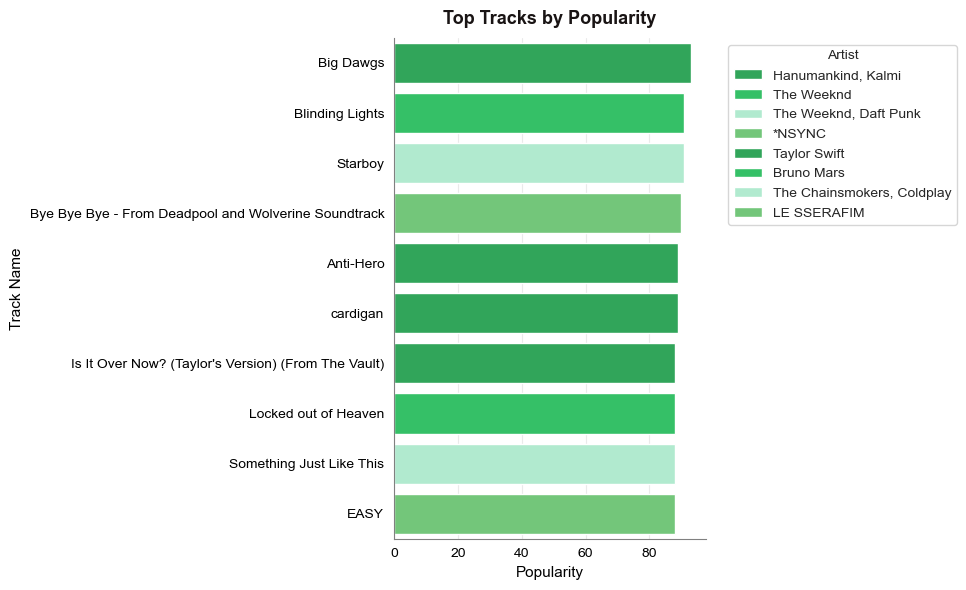

In [68]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='popularity',
    y='track_name',
    data=top_tracks,
    hue='artist_name',
    dodge=False,
    palette=spotify_palette
)
plt.title("Top Tracks by Popularity", color=spotify_gray, weight='bold', pad=10)
plt.xlabel("Popularity")
plt.ylabel("Track Name")
plt.legend(title='Artist', bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine()
plt.tight_layout()
plt.show()

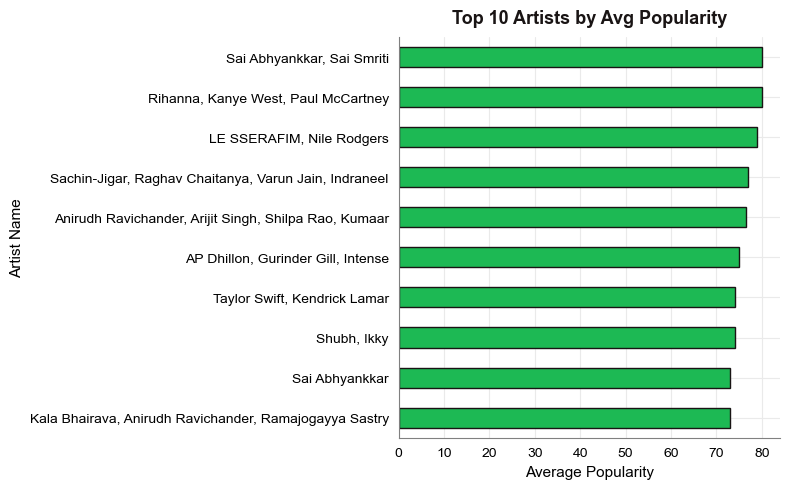

In [69]:
artist_pop = df.groupby('artist_name')['popularity'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,5))
artist_pop.plot(
    kind='barh',
    color=spotify_green,
    edgecolor=spotify_gray
)
plt.title("Top 10 Artists by Avg Popularity", color=spotify_gray, weight='bold', pad=10)
plt.xlabel("Average Popularity")
plt.ylabel("Artist Name")
plt.gca().invert_yaxis()
sns.despine()
plt.tight_layout()
plt.show()

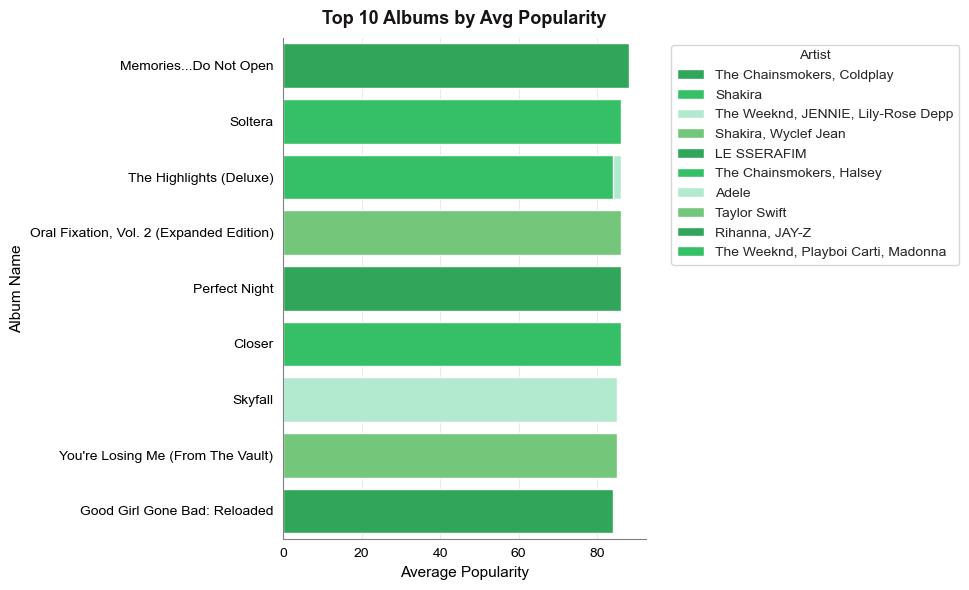

In [70]:
album_pop = df.groupby(['album_name', 'artist_name'])['popularity'].mean().reset_index()
top_albums = album_pop.sort_values(by='popularity', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(
    y='album_name',
    x='popularity',
    data=top_albums,
    hue='artist_name',
    dodge=False,
    palette=spotify_palette
)
plt.title("Top 10 Albums by Avg Popularity", color=spotify_gray, weight='bold', pad=10)
plt.xlabel("Average Popularity")
plt.ylabel("Album Name")
plt.legend(title='Artist', bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine()
plt.tight_layout()
plt.show()

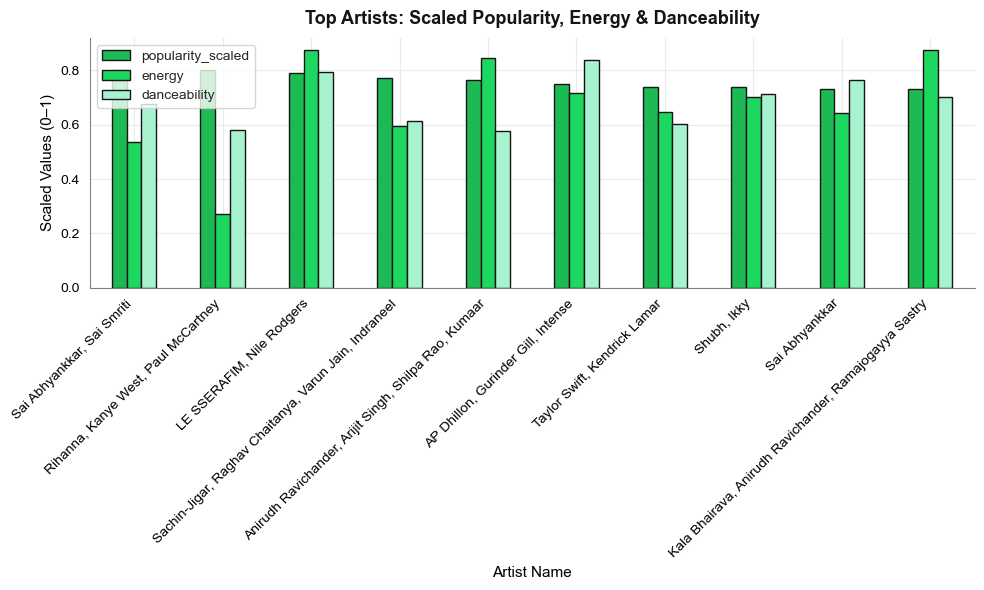

In [71]:
artist_feat = df.groupby('artist_name')[['popularity', 'energy', 'danceability']].mean().sort_values(by='popularity', ascending=False).head(10)

# Scale popularity for comparison
artist_feat['popularity_scaled'] = artist_feat['popularity'] / 100

artist_feat[['popularity_scaled', 'energy', 'danceability']].plot(
    kind='bar',
    figsize=(10,6),
    color=[spotify_green, spotify_light_green, "#A7F3D0"],
    edgecolor=spotify_gray
)
plt.title("Top Artists: Scaled Popularity, Energy & Danceability", color=spotify_gray, weight='bold', pad=10)
plt.ylabel("Scaled Values (0–1)")
plt.xlabel("Artist Name")
plt.xticks(rotation=45, ha='right')
sns.despine()
plt.tight_layout()
plt.show()

## Temporal Analysis:

In [72]:
# Spotify brand colors
spotify_green = "#1DB954"
spotify_light_green = "#1ED760"
spotify_dark_green = "#15883E"
spotify_gray = "#191414"
spotify_mint = "#A7F3D0"

# Define palette for multiple lines
spotify_palette = [spotify_green, spotify_light_green, spotify_dark_green, spotify_mint]

# Clean white background theme
sns.set_style("whitegrid")
plt.rcParams.update({
    "axes.facecolor": "white",
    "figure.facecolor": "white",
    "axes.edgecolor": "gray",
    "grid.color": "#EAEAEA",
    "axes.labelcolor": "black",
    "xtick.color": "black",
    "ytick.color": "black",
    "axes.titleweight": "bold",
    "axes.titlesize": 13,
    "axes.labelsize": 11
})

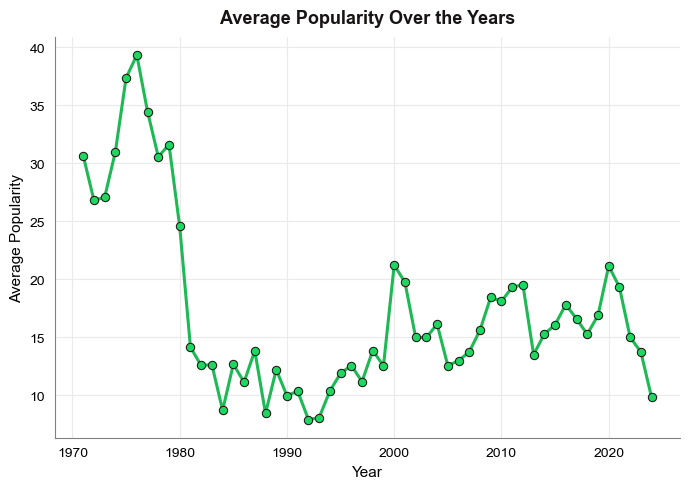

In [73]:
pop_by_year = df.groupby('year')['popularity'].mean().reset_index()

plt.figure(figsize=(7,5))
sns.lineplot(
    x='year', y='popularity',
    data=pop_by_year,
    marker='o',
    color=spotify_green,
    linewidth=2.2,
    markerfacecolor=spotify_light_green,
    markeredgecolor=spotify_gray
)
plt.title("Average Popularity Over the Years", color=spotify_gray, weight='bold', pad=10)
plt.xlabel("Year")
plt.ylabel("Average Popularity")
sns.despine()
plt.tight_layout()
plt.show()

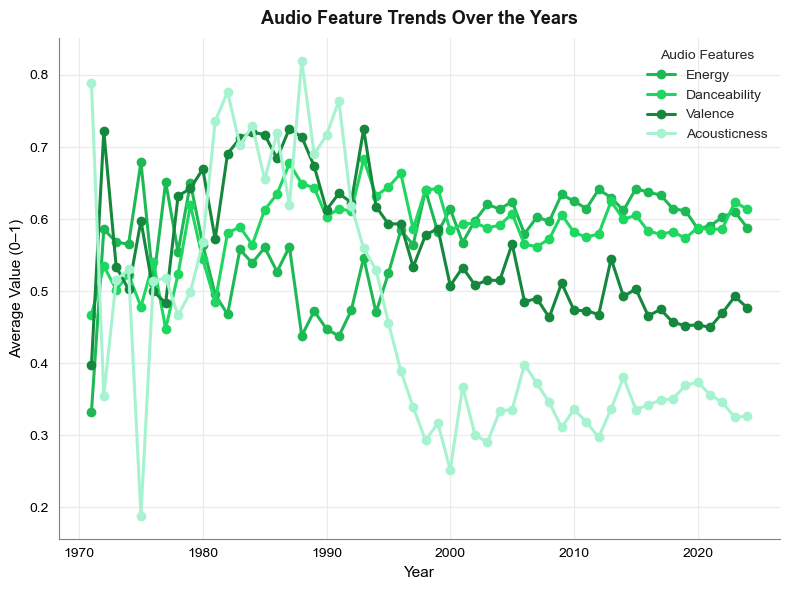

In [75]:
features = ['energy', 'danceability', 'valence', 'acousticness']
yearly_features = df.groupby('year')[features].mean().reset_index()

plt.figure(figsize=(8,6))
for col, color in zip(features, spotify_palette):
    plt.plot(
        yearly_features['year'], 
        yearly_features[col], 
        label=col.capitalize(), 
        color=color, 
        linewidth=2.2, 
        marker='o',
        markersize=6
    )

plt.legend(title="Audio Features", frameon=False)
plt.title("Audio Feature Trends Over the Years", color=spotify_gray, weight='bold', pad=10)
plt.xlabel("Year")
plt.ylabel("Average Value (0–1)")
sns.despine()
plt.tight_layout()
plt.show()

## Cluster Suggestions:

In [76]:
energetic_tracks = df[['track_name', 'artist_name', 'album_name','energy']].sort_values(by='energy', ascending=False).head(15)
chill_tracks = df[['track_name', 'artist_name', 'album_name','acousticness']].sort_values(by='acousticness', ascending=False).head(15)
podcast_tracks = df[['track_name', 'artist_name', 'album_name','speechiness']].sort_values(by='speechiness', ascending=False).head(15)

In [77]:
energetic_tracks

,track_name,artist_name,album_name,energy
33569,I Was Crazy About You,2PM,1:59PM,0.999
2232,Action With Aggressive,Yuvan Shankar Raja,Sandakozhi (Original Soundtrack),0.999
33357,Tetris - Buzz & Flipswitch Remix,"2PM, Buzz & Flipswitch",Tetris,0.999
5957,Skanda Title Theme,Thaman S,Skanda (Orginal Background Score),0.998
29790,"Rockstar - Rearranged Version, Live",SUPER JUNIOR,SUPER SHOW 6 - SUPER JUNIOR The 6th WORLD TOUR,0.998
34839,Oxytocin,Infinite,Oxytocin,0.998
34874,The Edge,Infinite,The Edge,0.998
9538,Dhan Bada Ye Janu,"Munna Mohit, Sadhna Chauhan",Dhan Bada Ye Janu,0.998
43855,Pts.Of.Athrty (Crystal Method Remix) - LPU Rar...,"Linkin Park, The Crystal Method",Hybrid Theory (20th Anniversary Edition),0.998
16903,Dom Kudithe,"Shankar Mahadevan, Chitra",Khatarnak,0.998


In [78]:
chill_tracks

,track_name,artist_name,album_name,acousticness
35964,Hawk Meditations,Blue,Indigo Soulstice,0.996
46851,"Lullaby (Goodnight, My Angel)","Billy Joel, Lara Downes","Lullaby (Goodnight, My Angel)",0.996
58250,Chapters Of History,Daniel Alexis Pemberton,Creative Review,0.996
35451,Discrepency,Treasure,Discrepency,0.996
54557,Boon Bestowed: III. The Madonna - Life,"Katie Madonna Lee, Cecily Terhune",Boon Bestowed,0.996
58044,Christmas Lullaby,Daniel Pemberton,Christmas Cheer,0.996
59570,Ramin Djawadi: Game of Thrones Theme in the St...,"Ramin Djawadi, Claudio Ferrarini",Ramin Djawadi: Game of Thrones Theme in the St...,0.996
45927,Alan Silvestri: Believe (Arr. for flute by Cla...,"Alan Silvestri, Claudio Ferrarini",Alan Silvestri: Believe (Arr. for flute by Cla...,0.996
57869,Alone In Exile,Daniel Alexis Pemberton,Revolution And Empire,0.996
54517,With Love I Survive,Madonna Z,With Love I Survive,0.996


In [79]:
podcast_tracks

,track_name,artist_name,album_name,speechiness
61653,Chapter 51 - Nowhere to Hide,"Keri Beevis, Shakira Shute",Nowhere to Hide (Unabridged),0.959
61568,Chapter 109 - Cottage by the Sea - A BRAND NEW...,"Keri Beevis, Shakira Shute",Cottage by the Sea [A BRAND NEW pulse-pounding...,0.958
61300,Chapter 81 - Nowhere to Hide,"Keri Beevis, Shakira Shute",Nowhere to Hide (Unabridged),0.957
29371,Dear Diary : 2016.07.29,ATEEZ,ZERO : FEVER Part.1,0.957
61434,Chapter 68 - Nowhere to Hide,"Keri Beevis, Shakira Shute",Nowhere to Hide (Unabridged),0.956
61556,Chapter 54 - Cottage by the Sea - A BRAND NEW ...,"Keri Beevis, Shakira Shute",Cottage by the Sea [A BRAND NEW pulse-pounding...,0.956
61531,Chapter 156 - Cottage by the Sea - A BRAND NEW...,"Keri Beevis, Shakira Shute",Cottage by the Sea [A BRAND NEW pulse-pounding...,0.956
60212,A Tragedy,Shakira Searle,Poetry of Sir Arthur Conan Doyle,0.955
61349,Chapter 32 - Nowhere to Hide,"Keri Beevis, Shakira Shute",Nowhere to Hide (Unabridged),0.955
61486,Chapter 112 - Cottage by the Sea - A BRAND NEW...,"Keri Beevis, Shakira Shute",Cottage by the Sea [A BRAND NEW pulse-pounding...,0.955
